In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
#from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("VALUE_OK_POF.csv")
df_team = pd.read_csv("po_teams.csv")

In [4]:
df_team['W%'] = df_team.apply(lambda row: round(row['W']/row['G'],1),axis=1)
df_team

,Rk,Team,TM,G,MP,FG,FGA,FG%,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,W,W%
0,1,Los Angeles Clippers,LAC,10,2425,429,867,0.495,122,323,...,365,457,212,73,36,132,234,1190,7,0.7
1,2,Denver Nuggets,DEN,11,2665,428,939,0.456,150,389,...,340,453,244,66,50,140,244,1169,5,0.5
2,3,Toronto Raptors,TOR,10,2450,399,898,0.444,153,415,...,364,447,256,77,54,126,224,1116,7,0.7
3,4,Milwaukee Bucks,MIL,10,2425,401,871,0.460,133,371,...,373,467,243,72,42,149,217,1111,5,0.5
4,5,Houston Rockets,HOU,10,2425,388,875,0.443,176,479,...,339,409,214,93,33,132,219,1096,5,0.5
5,6,Boston Celtics,BOS,10,2450,381,839,0.454,127,361,...,380,459,213,63,54,140,219,1092,7,0.7
6,7,Miami Heat,MIA,9,2185,336,729,0.461,127,334,...,328,404,220,72,37,133,170,1009,8,0.9
7,8,Los Angeles Lakers,LAL,8,1920,339,686,0.494,93,270,...,277,367,203,69,49,123,166,912,6,0.8
8,9,Utah Jazz,UTA,7,1705,279,573,0.487,110,261,...,223,288,150,43,22,84,133,794,3,0.4
9,10,Oklahoma City Thunder,OKC,7,1705,257,598,0.430,84,256,...,286,349,125,37,28,119,120,728,3,0.4


<AxesSubplot:>

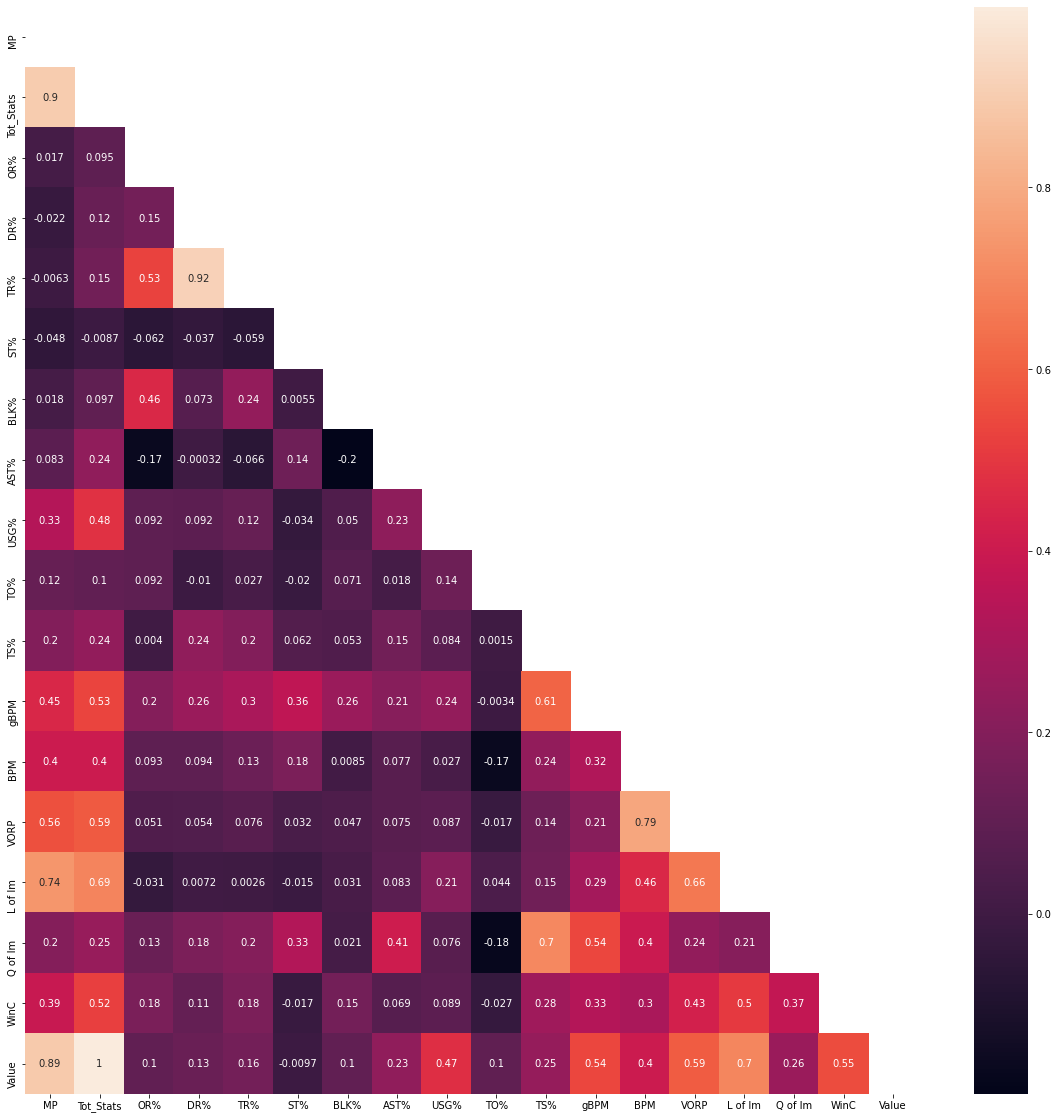

In [5]:
df_heat = df.iloc[:,3:]
plt.figure(figsize=(20,20))
matrix = np.triu(df_heat.corr())
sns.heatmap(df_heat.corr(), annot= True, mask=matrix)

In [6]:
df = df.sort_values(by=['Value'], ascending = False)
df.head(20)

,Unnamed: 0,Name,Age,Team,MP,Tot_Stats,OR%,DR%,TR%,ST%,...,TO%,TS%,gBPM,BPM,VORP,L of Im,Q of Im,WinC,Value,Pos
115,117,Kawhi Leonard,28,LAC,386,17.053097,5.9,21.8,14.1,2.9,...,0.098,0.610,12.4,25.3,2.6,0.1,5.1,0.5,8.8,SF
77,78,James Harden,30,HOU,366,14.899055,2.3,15.1,8.6,2.0,...,0.125,0.640,15.2,20.5,2.1,0.1,4.5,0.5,7.7,SG
100,101,LeBron James,35,LAL,278,14.459073,2.0,28.9,15.5,1.9,...,0.189,0.679,15.8,13.4,1.1,0.1,4.5,0.3,7.4,PG
5,5,Giannis Antetokounmpo,25,MIL,277,14.110421,10.3,38.2,24.0,1.1,...,0.132,0.610,17.2,23.8,1.8,0.1,3.9,0.5,7.3,PF
45,46,Anthony Davis,26,LAL,275,13.794518,9.8,25.2,17.5,2.0,...,0.079,0.665,14.6,12.2,1.0,0.1,7.0,0.5,7.1,PF
184,186,Jayson Tatum,21,BOS,394,13.509894,5.1,21.5,13.9,1.0,...,0.104,0.578,8.9,11.0,1.3,0.2,3.4,0.6,7.1,PF
104,106,Nikola Jokić,24,DEN,408,14.130528,5.0,24.4,14.3,0.8,...,0.125,0.613,10.8,21.6,2.4,0.1,0.8,0.0,7.1,C
144,146,Jamal Murray,22,DEN,422,13.565455,3.5,11.4,7.3,1.2,...,0.096,0.622,11.0,21.8,2.5,0.1,1.7,0.1,6.8,PG
121,123,Kyle Lowry,33,TOR,372,11.735905,2.0,17.6,9.6,2.5,...,0.138,0.571,9.8,17.7,1.8,0.1,2.9,0.3,6.0,PG
194,196,Fred VanVleet,25,TOR,385,11.604862,1.4,11.5,6.3,2.3,...,0.095,0.541,9.1,17.0,1.8,0.1,2.4,0.2,5.9,PG


In [7]:
df.sort_values(by=['Tot_Stats'], ascending = False).head(10)

,Unnamed: 0,Name,Age,Team,MP,Tot_Stats,OR%,DR%,TR%,ST%,...,TO%,TS%,gBPM,BPM,VORP,L of Im,Q of Im,WinC,Value,Pos
115,117,Kawhi Leonard,28,LAC,386,17.053097,5.9,21.8,14.1,2.9,...,0.098,0.610,12.4,25.3,2.6,0.1,5.1,0.5,8.8,SF
77,78,James Harden,30,HOU,366,14.899055,2.3,15.1,8.6,2.0,...,0.125,0.640,15.2,20.5,2.1,0.1,4.5,0.5,7.7,SG
100,101,LeBron James,35,LAL,278,14.459073,2.0,28.9,15.5,1.9,...,0.189,0.679,15.8,13.4,1.1,0.1,4.5,0.3,7.4,PG
104,106,Nikola Jokić,24,DEN,408,14.130528,5.0,24.4,14.3,0.8,...,0.125,0.613,10.8,21.6,2.4,0.1,0.8,0.0,7.1,C
5,5,Giannis Antetokounmpo,25,MIL,277,14.110421,10.3,38.2,24.0,1.1,...,0.132,0.610,17.2,23.8,1.8,0.1,3.9,0.5,7.3,PF
45,46,Anthony Davis,26,LAL,275,13.794518,9.8,25.2,17.5,2.0,...,0.079,0.665,14.6,12.2,1.0,0.1,7.0,0.5,7.1,PF
144,146,Jamal Murray,22,DEN,422,13.565455,3.5,11.4,7.3,1.2,...,0.096,0.622,11.0,21.8,2.5,0.1,1.7,0.1,6.8,PG
184,186,Jayson Tatum,21,BOS,394,13.509894,5.1,21.5,13.9,1.0,...,0.104,0.578,8.9,11.0,1.3,0.2,3.4,0.6,7.1,PF
121,123,Kyle Lowry,33,TOR,372,11.735905,2.0,17.6,9.6,2.5,...,0.138,0.571,9.8,17.7,1.8,0.1,2.9,0.3,6.0,PG
194,196,Fred VanVleet,25,TOR,385,11.604862,1.4,11.5,6.3,2.3,...,0.095,0.541,9.1,17.0,1.8,0.1,2.4,0.2,5.9,PG


In [8]:
df.sort_values(by = ['USG%'], ascending = False).head(30)

,Unnamed: 0,Name,Age,Team,MP,Tot_Stats,OR%,DR%,TR%,ST%,...,TO%,TS%,gBPM,BPM,VORP,L of Im,Q of Im,WinC,Value,Pos
138,140,Donovan Mitchell,23,UTA,264,10.269472,2.7,12.6,7.8,1.4,...,0.137,0.696,10.5,2.7,0.3,0.0,2.1,0.1,5.2,SG
49,50,Luka Dončić,20,DAL,215,9.662840,2.0,28.3,15.0,1.6,...,0.166,0.596,13.0,-4.6,-0.1,0.0,-1.4,-0.0,4.8,PG
15,15,Bol Bol,20,DEN,17,1.101736,19.8,14.1,17.0,6.2,...,0.148,0.738,12.2,23.0,0.1,0.0,6.5,0.0,0.6,SF
5,5,Giannis Antetokounmpo,25,MIL,277,14.110421,10.3,38.2,24.0,1.1,...,0.132,0.610,17.2,23.8,1.8,0.1,3.9,0.5,7.3,PF
55,56,Joel Embiid,25,PHI,145,5.533152,8.0,28.9,18.2,2.1,...,0.130,0.600,6.5,-50.9,-1.8,0.0,0.5,0.0,2.8,C
203,206,Russell Westbrook,31,HOU,185,5.320940,5.2,24.4,14.5,1.9,...,0.168,0.456,2.2,7.5,0.4,0.1,-3.3,-0.2,2.6,PG
77,78,James Harden,30,HOU,366,14.899055,2.3,15.1,8.6,2.0,...,0.125,0.640,15.2,20.5,2.1,0.1,4.5,0.5,7.7,SG
100,101,LeBron James,35,LAL,278,14.459073,2.0,28.9,15.5,1.9,...,0.189,0.679,15.8,13.4,1.1,0.1,4.5,0.3,7.4,PG
115,117,Kawhi Leonard,28,LAC,386,17.053097,5.9,21.8,14.1,2.9,...,0.098,0.610,12.4,25.3,2.6,0.1,5.1,0.5,8.8,SF
45,46,Anthony Davis,26,LAL,275,13.794518,9.8,25.2,17.5,2.0,...,0.079,0.665,14.6,12.2,1.0,0.1,7.0,0.5,7.1,PF


In [9]:
df.sort_values(by = ['WinC'], ascending = False).head(10)

,Unnamed: 0,Name,Age,Team,MP,Tot_Stats,OR%,DR%,TR%,ST%,...,TO%,TS%,gBPM,BPM,VORP,L of Im,Q of Im,WinC,Value,Pos
211,214,Ivica Zubac,22,LAC,245,6.323710,10.2,21.1,15.8,0.2,...,0.108,0.706,4.5,17.4,1.2,0.1,26.2,1.5,3.9,C
198,201,Kemba Walker,29,BOS,369,10.156930,0.6,10.3,5.8,1.4,...,0.092,0.600,7.7,9.8,1.1,0.2,4.2,0.7,5.4,PG
2,2,Bam Adebayo,22,MIA,318,10.985548,10.7,26.1,18.9,1.3,...,0.169,0.617,9.5,9.3,0.9,0.1,4.7,0.6,5.8,PF
184,186,Jayson Tatum,21,BOS,394,13.509894,5.1,21.5,13.9,1.0,...,0.104,0.578,8.9,11.0,1.3,0.2,3.4,0.6,7.1,PF
205,208,Grant Williams,21,BOS,113,1.878799,5.3,10.0,7.8,0.0,...,0.082,0.866,7.8,9.9,0.3,0.1,12.2,0.6,1.2,PF
115,117,Kawhi Leonard,28,LAC,386,17.053097,5.9,21.8,14.1,2.9,...,0.098,0.610,12.4,25.3,2.6,0.1,5.1,0.5,8.8,SF
186,188,Daniel Theis,27,BOS,280,7.063109,6.0,19.9,13.4,0.9,...,0.094,0.580,7.2,9.3,0.8,0.1,3.9,0.5,3.8,C
119,121,Brook Lopez,31,MIL,328,8.205798,6.1,12.0,9.0,1.5,...,0.089,0.643,7.5,14.1,1.3,0.1,3.5,0.5,4.4,C
40,41,Robert Covington,29,HOU,333,9.764436,2.6,15.9,9.1,3.9,...,0.110,0.707,12.6,17.9,1.7,0.1,5.8,0.5,5.1,C
25,25,Jimmy Butler,30,MIA,318,10.773835,6.9,10.9,9.0,3.0,...,0.164,0.640,9.0,8.8,0.9,0.1,4.2,0.5,5.6,SF


In [12]:
df = pd.read_csv("VALUE_OK_POF.csv")
df1=df.drop_duplicates(subset = ['Name'] ,keep='last')
df=df1
df['x'] = df.apply(lambda row: round((-1)*row['Value']/(row['USG%']+0.1),1),axis = 1)
df['TeamC'] = df.apply(lambda row: round((row['WinC']*row['USG%']*0.5+row['Tot_Stats']*0.5),1), axis = 1)

<AxesSubplot:>

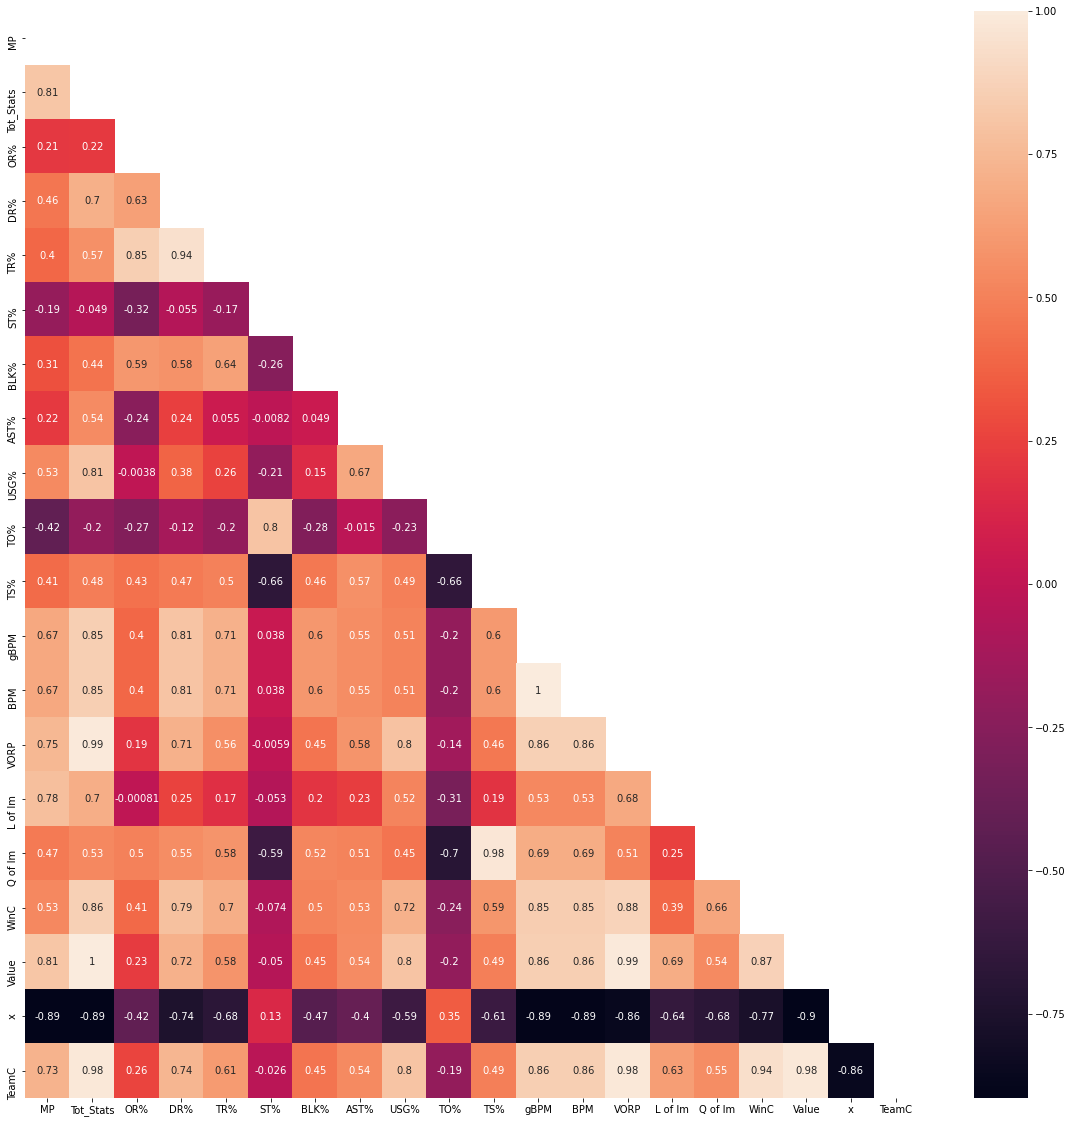

In [14]:

LAL = "LAL"
HOU = "HOU"
LAC = "DEN"
MIA = "MIA"
BOS = "BOS"
TOR = "TOR"



df_LAL = df[df['Team'] == LAL]
W_LAL = df_team.loc[df_team['TM'] == LAL]['W%'].values
W_LAL = W_LAL[0]
df_LAL['TeamC'] = df_LAL.apply(lambda row: round(row['WinC']*W_LAL*row['USG%']*0.5+row['Tot_Stats']*0.5,1), axis=1)

df_LAL.sort_values(by=['USG%'], ascending = False)
df_heat = df_LAL.iloc[:,3:]
plt.figure(figsize=(20,20))
matrix = np.triu(df_heat.corr())
sns.heatmap(df_heat.corr(), annot= True, mask=matrix)

In [15]:
df_LAL['TeamC'].sum()

35.800000000000004

In [17]:
df_LAC = df[df['Team'] == LAC]
W_LAC = df_team.loc[df_team['TM'] == LAC]['W%'].values
W_LAC = W_LAC[0]
df_LAC.sort_values(by=['USG%'], ascending = False)
df_LAC['TeamC'] = df_LAC.apply(lambda row: round(row['WinC']*row['USG%']*W_LAC*0.5+row['Tot_Stats']*0.5,1), axis=1)
df_LAC

,Unnamed: 0,Name,Age,Team,MP,Tot_Stats,OR%,DR%,TR%,ST%,...,gBPM,BPM,VORP,L of Im,Q of Im,WinC,Value,Pos,x,TeamC
10,10,Keita Bates-Diop,24,DEN,22,0.378612,15.3,16.3,15.8,0.0,...,-2.4,8.4,0.1,0.0,-5.8,-0.0,0.2,SF,-0.0,0.2
15,15,Bol Bol,20,DEN,17,1.101736,19.8,14.1,17.0,6.2,...,12.2,23.0,0.1,0.0,6.5,0.0,0.6,SF,-0.0,0.6
39,40,Tyler Cook,22,DEN,4,0.096000,0.0,59.9,29.0,0.0,...,-8.9,1.9,0.0,0.0,-22.4,-0.0,0.0,PF,-0.0,0.0
41,42,Torrey Craig,29,DEN,239,2.704748,4.7,14.5,9.5,0.9,...,2.8,13.6,0.9,0.0,-3.6,-0.1,1.3,SF,-0.1,1.1
44,45,Troy Daniels,28,DEN,25,0.313555,4.5,9.6,7.0,0.0,...,-1.7,9.1,0.1,0.0,-4.6,-0.0,0.2,SG,-0.0,0.2
51,52,PJ Dozier,23,DEN,91,1.247760,1.2,15.8,8.3,0.6,...,-0.8,10.0,0.3,0.0,-5.8,-0.1,0.6,PG,-0.0,0.2
70,71,Jerami Grant,25,DEN,382,5.014252,1.5,9.4,5.3,0.6,...,3.9,14.7,1.6,0.1,-3.6,-0.2,2.4,PF,-0.2,1.8
79,80,Gary Harris,25,DEN,159,2.508538,2.8,5.3,4.0,3.3,...,6.3,17.1,0.8,0.0,-2.1,-0.1,1.2,SG,-0.1,0.9
104,106,Nikola Jokić,24,DEN,408,14.130528,5.0,24.4,14.3,0.8,...,10.8,21.6,2.4,0.1,0.8,0.0,7.1,C,-0.2,7.1
136,138,Paul Millsap,34,DEN,250,5.246989,7.2,12.9,10.0,1.9,...,5.9,16.7,1.2,0.0,-0.8,-0.0,2.6,PF,-0.2,2.6


In [18]:
df_LAC['TeamC'].mean()

2.0266666666666664

In [19]:
df_MIA = df[df['Team'] == MIA]
W_MIA = df_team.loc[df_team['TM'] == MIA]['W%'].values
W_MIA = W_MIA[0]
df_MIA.sort_values(by=['USG%'], ascending = False)
df_MIA['TeamC'] = df_MIA.apply(lambda row: round(row['WinC']*row['USG%']*W_MIA*0.5+row['Tot_Stats']*0.5,1), axis=1)
df_MIA

,Unnamed: 0,Name,Age,Team,MP,Tot_Stats,OR%,DR%,TR%,ST%,...,gBPM,BPM,VORP,L of Im,Q of Im,WinC,Value,Pos,x,TeamC
2,2,Bam Adebayo,22,MIA,318,10.985548,10.7,26.1,18.9,1.3,...,9.5,9.3,0.9,0.1,4.7,0.6,5.8,PF,-0.3,10.9
25,25,Jimmy Butler,30,MIA,318,10.773835,6.9,10.9,9.0,3.0,...,9.0,8.8,0.9,0.1,4.2,0.5,5.6,SF,-0.2,11.2
42,43,Jae Crowder,29,MIA,270,6.669264,2.2,20.4,11.8,1.3,...,7.5,7.3,0.6,0.1,3.7,0.4,3.5,SF,-0.2,6.3
52,53,Goran Dragić,33,MIA,312,8.270168,3.9,10.4,7.3,1.8,...,6.5,6.3,0.7,0.1,1.5,0.2,4.2,PG,-0.2,6.6
83,84,Tyler Herro,20,MIA,291,6.427873,0.8,15.6,8.6,0.5,...,4.0,3.8,0.4,0.1,1.0,0.1,3.3,SG,-0.2,4.1
94,95,Andre Iguodala,36,MIA,188,3.854623,2.6,12.6,7.9,2.4,...,7.7,7.5,0.4,0.1,2.6,0.2,2.0,SG,-0.2,2.7
105,107,Derrick Jones Jr.,22,MIA,56,1.881770,4.3,7.7,6.1,4.5,...,13.0,12.8,0.2,0.0,9.5,0.2,1.0,SF,-0.1,1.9
116,118,Meyers Leonard,27,MIA,9,0.080000,0.0,0.0,0.0,0.0,...,-13.8,-14.0,-0.0,0.0,-10.6,-0.0,0.0,C,-0.0,0.0
152,154,Kendrick Nunn,24,MIA,81,1.383055,0.0,10.7,5.6,1.9,...,-2.3,-2.5,-0.0,0.0,-5.5,-0.2,0.6,SG,-0.0,-1.2
158,160,Kelly Olynyk,28,MIA,105,4.114870,6.9,38.0,23.4,1.0,...,9.0,8.8,0.3,0.0,4.3,0.2,2.2,C,-0.1,3.9


In [20]:
df_MIA['TeamC'].mean()

4.454545454545454

In [21]:
df_BOS = df[df['Team'] == BOS]
W_BOS = df_team.loc[df_team['TM'] == BOS]['W%'].values
W_BOS = W_BOS[0]
df_BOS.sort_values(by=['USG%'], ascending = False)
df_BOS['TeamC'] = df_BOS.apply(lambda row: round(row['WinC']*row['USG%']*W_BOS*0.5+row['Tot_Stats']*0.5,1), axis=1)
df_BOS

,Unnamed: 0,Name,Age,Team,MP,Tot_Stats,OR%,DR%,TR%,ST%,...,gBPM,BPM,VORP,L of Im,Q of Im,WinC,Value,Pos,x,TeamC
20,20,Jaylen Brown,23,BOS,383,9.606540,2.5,18.3,11.0,1.7,...,4.5,6.6,0.8,0.2,0.9,0.2,4.9,SF,-0.2,6.6
54,55,Carsen Edwards,21,BOS,3,0.048000,0.0,34.4,18.4,0.0,...,-5.1,-3.0,-0.0,0.0,-20.1,-0.0,0.0,SG,-0.0,0.0
57,58,Tacko Fall,24,BOS,3,0.143745,0.0,34.4,18.4,0.0,...,-3.1,-1.0,0.0,0.0,10.5,0.0,0.1,C,-0.0,0.1
73,74,Javonte Green,26,BOS,6,0.098000,0.0,17.2,9.2,0.0,...,0.9,3.0,0.0,0.0,6.9,0.0,0.0,SF,-0.0,0.0
82,83,Gordon Hayward,29,BOS,34,1.033538,0.0,12.1,6.5,5.9,...,6.0,8.1,0.1,0.0,0.2,0.0,0.5,SF,-0.0,0.5
106,108,Enes Kanter,27,BOS,68,1.317059,21.0,19.7,20.3,0.0,...,2.4,4.5,0.1,0.0,1.2,0.0,0.7,C,-0.0,0.7
113,115,Romeo Langford,20,BOS,44,0.267824,0.0,7.0,3.8,1.1,...,-3.0,-0.9,0.0,0.0,-5.3,-0.1,0.1,SG,-0.0,-0.3
156,158,Semi Ojeleye,25,BOS,90,0.570004,1.3,6.9,4.3,1.7,...,-2.2,-0.1,0.0,0.0,-5.9,-0.2,0.2,PF,-0.0,-0.5
164,166,Vincent Poirier,26,BOS,2,0.180000,0.0,0.0,0.0,25.3,...,12.2,14.3,0.0,0.0,35.7,0.0,0.1,C,-1.0,0.1
181,183,Marcus Smart,25,BOS,375,7.704499,1.3,14.9,8.6,1.5,...,5.9,8.0,0.9,0.2,0.4,0.1,3.9,SG,-0.2,4.4


In [22]:
df_BOS['TeamC'].sum()

49.3

In [23]:
df_TOR = df[df['Team'] == TOR]
W_TOR = df_team.loc[df_team['TM'] == TOR]['W%'].values
W_TOR = W_TOR[0]
df_TOR.sort_values(by=['USG%'], ascending = False)
df_TOR['TeamC'] = df_TOR.apply(lambda row: round(row['WinC']*row['USG%']*0.5*W_TOR+row['Tot_Stats']*0.5,1), axis=1)
df_TOR

,Unnamed: 0,Name,Age,Team,MP,Tot_Stats,OR%,DR%,TR%,ST%,...,gBPM,BPM,VORP,L of Im,Q of Im,WinC,Value,Pos,x,TeamC
7,7,OG Anunoby,22,TOR,357,7.867164,7.0,14.0,10.4,1.5,...,7.5,15.4,1.5,0.1,2.0,0.2,4.0,SF,-0.3,4.9
16,16,Chris Boucher,27,TOR,43,0.747888,7.3,23.3,15.0,0.0,...,-1.1,6.8,0.1,0.0,-4.0,-0.0,0.4,PF,-0.0,0.4
46,47,Terence Davis,22,TOR,84,1.636743,2.5,14.6,8.3,0.6,...,4.2,12.1,0.3,0.0,2.1,0.0,0.8,SG,-0.0,0.8
65,66,Marc Gasol,35,TOR,208,4.051959,2.0,20.8,11.1,0.9,...,2.9,10.8,0.7,0.1,-1.7,-0.1,2.0,C,-0.1,1.5
89,90,Rondae Hollis-Jefferson,25,TOR,39,1.069941,13.4,14.2,13.8,2.5,...,7.0,14.9,0.2,0.0,4.7,0.0,0.5,SF,-0.0,0.5
93,94,Serge Ibaka,30,TOR,231,9.271200,7.2,29.3,17.9,0.4,...,11.2,19.1,1.2,0.1,6.7,0.4,4.8,C,-0.2,7.7
102,104,Stanley Johnson,23,TOR,20,0.687455,5.2,16.7,10.8,0.0,...,10.4,18.3,0.1,0.0,3.6,0.0,0.3,PF,-0.0,0.3
121,123,Kyle Lowry,33,TOR,372,11.735905,2.0,17.6,9.6,2.5,...,9.8,17.7,1.8,0.1,2.9,0.3,6.0,PG,-0.3,8.1
135,137,Malcolm Miller,26,TOR,5,-0.020000,0.0,0.0,0.0,0.0,...,-6.7,1.2,0.0,0.0,-3.2,-0.0,-0.0,SF,0.0,-0.0
167,169,Norman Powell,26,TOR,241,4.792995,1.3,9.2,5.1,1.2,...,4.9,12.8,0.9,0.1,2.5,0.1,2.4,SG,-0.1,3.1


In [24]:
df_TOR['TeamC'].sum()


39.7

In [29]:
print(
"LAL:",df_LAL['TeamC'].sum(),"\n"
"DEN:",df_LAC['TeamC'].sum(),"\n"
"MIA:",df_MIA['TeamC'].sum(),"\n"
"BOS:",df_BOS['TeamC'].sum(),"\n"
"TOR:",df_TOR['TeamC'].sum())

LAL: 35.800000000000004 
DEN: 30.4 
MIA: 49.0 
BOS: 49.3 
TOR: 39.7


In [26]:
print(
"LAL:",df_LAL['Value'].mean(),"\n"
"LAC:",df_LAC['Value'].mean(),"\n"
"MIA:",df_MIA['Value'].mean(),"\n"
"BOS:",df_BOS['Value'].mean(),"\n"
"TOR:",df_TOR['Value'].mean())


LAL: 1.9785714285714284 
LAC: 2.066666666666667 
MIA: 2.7454545454545456 
BOS: 1.8647058823529412 
TOR: 2.3214285714285716


In [28]:
print(
"LAL:",df_LAL['TeamC'].mean(),"\n"
"LAC:",df_LAC['TeamC'].mean(),"\n"
"MIA:",df_MIA['TeamC'].mean(),"\n"
"BOS:",df_BOS['TeamC'].mean(),"\n"
"TOR:",df_TOR['TeamC'].mean())

LAL: 2.5571428571428574 
LAC: 2.0266666666666664 
MIA: 4.454545454545454 
BOS: 2.9 
TOR: 2.835714285714286


In [ ]:
df_LAL.sort_values(by=['Pos', 'Value'],ascending = 'True')
df_TLAL=pd.DataFrame(columns = ['Name','Rank','Pos','USG%', 'WinC','Value','TeamC'])
df_TLAL['Name'] = df_LAL['Name']
df_TLAL['Rank'] = df_LAL['Rank']
df_TLAL['Pos'] = df_LAL['Pos']
df_TLAL['USG%'] = df_LAL['USG%']
df_TLAL['WinC'] = df_LAL['WinC']
df_TLAL['Value'] = df_LAL['Value']
df_TLAL['TeamC'] = df_LAL['TeamC']
df_TLAL.head(5)

In [ ]:
df_MIA.sort_values(by='USG%',ascending='True')

In [ ]:
df_BOS.head(10)

<AxesSubplot:xlabel='x', ylabel='TeamC'>

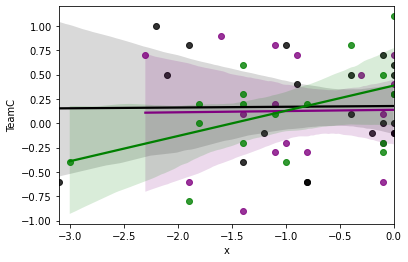

In [ ]:
df_MIA

In [ ]:
df_TOR

In [ ]:

df_v= pd.read_csv("win_team.csv")
df_v.plot.bar(x='Name' , rot=25, figsize=(15,10), color='orange')
plt.savefig('team.png')

<Figure size 432x288 with 0 Axes>

In [894]:
new_df = pd.read_csv("VALUE_OK_pos.csv")

In [896]:
new_df.head(5)

,Rank,Name,Age,Team,MP,Tot_Stats,OR%,DR%,TR%,ST%,...,TO%,TS%,gBPM,BPM,VORP,L of Im,Q of Im,WinC,Value,Pos
0,1,Giannis Antetokounmpo,25,MIL,1917,106.099292,7.7,34.8,22.1,1.5,...,0.132,0.613,16.6,11.9,6.7,10.2,10.9,111.7,108.9,PF
1,2,James Harden,30,HOU,2483,111.365567,3.1,16.3,9.7,2.5,...,0.142,0.626,16.4,10.5,7.8,6.6,7.6,50.3,80.8,SG
2,3,Rudy Gobert,27,UTA,2333,87.218770,10.6,30.6,20.8,1.0,...,0.150,0.699,9.0,1.9,2.3,6.7,9.2,61.2,74.2,C
3,4,Khris Middleton,28,MIL,1853,62.413571,2.5,17.0,10.2,1.3,...,0.116,0.619,8.3,3.6,2.6,9.9,8.6,85.4,73.9,SF
4,5,Nikola Jokić,24,DEN,2336,97.639270,8.1,26.7,17.4,1.8,...,0.158,0.605,14.0,8.5,6.2,5.5,7.0,38.2,67.9,C


In [907]:

new_df = new_df.drop("L of Im", axis = 1)

new_df = new_df.drop("Q of Im", axis = 1)

new_df = new_df.drop("BPM", axis = 1)

In [911]:
new_df.head(5)
plt.savefig("top5.png")

<Figure size 432x288 with 0 Axes>

In [912]:
new_df.head(5)

,Rank,Name,Age,Team,Tot_Stats,VORP,WinC,Value,Pos
0,1,Giannis Antetokounmpo,25,MIL,106.099292,6.7,111.7,108.9,PF
1,2,James Harden,30,HOU,111.365567,7.8,50.3,80.8,SG
2,3,Rudy Gobert,27,UTA,87.218770,2.3,61.2,74.2,C
3,4,Khris Middleton,28,MIL,62.413571,2.6,85.4,73.9,SF
4,5,Nikola Jokić,24,DEN,97.639270,6.2,38.2,67.9,C
